## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？

ans:樹的深度改成2時有明顯改變
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [29]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree


In [30]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier( criterion='gini',max_depth = 3)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [31]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.         0.06405315 0.93594685]


[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.663\nsamples = 112\nvalue = [32, 42, 38]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 42, 38]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

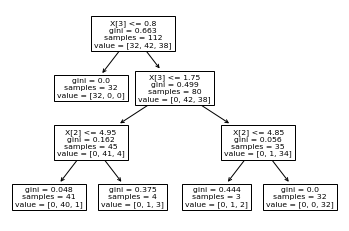

In [32]:
 tree.plot_tree(clf)

In [58]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree


In [59]:
# 讀取資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeRegressor( max_depth = 5)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.         0.         0.         0.00299987 0.04671228 0.
 0.61367513 0.         0.         0.08462354 0.         0.
 0.25198917]
Mean squared error: 0.04


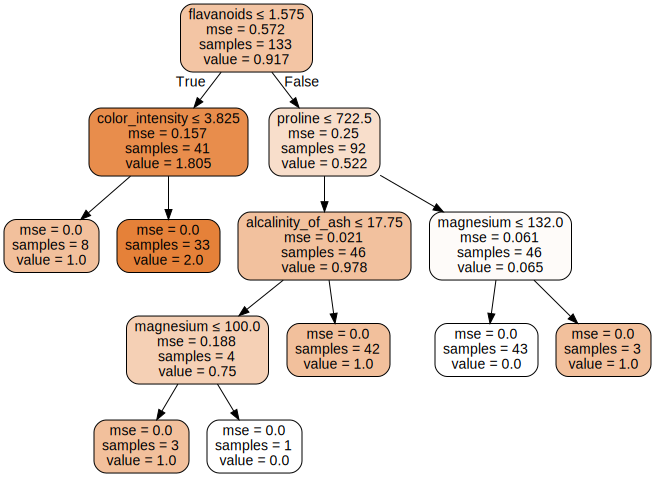

In [60]:

print(wine.feature_names)
print("Feature importance: ", clf.feature_importances_)
#tree.plot_tree(clf)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dot_data = export_graphviz(clf, out_file=None,feature_names=wine.feature_names,class_names=wine.target_names,filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)  
graph

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# 讀取資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)


# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-0.10139884  0.00890643 -0.22037614  0.04530773  0.00047883  0.13482576
 -0.325913   -0.15138182  0.03346     0.07702213 -0.15930159 -0.28874278
 -0.00079019]
Mean squared error: 0.07
